### Question 4
Examine the daily demand change pattern using the total number of trips recorded at
each hour of the day (Task 1, Question 3). You may observe different patterns across
stations.
1. Group the stations into distinct clusters based on the observed patterns using time
series clustering. Choose the number of clusters according to the variation in
patterns you identified. You can refer to the tslearn documentation for guidance on
conducting time series clustering.
2. Plot the clustering results on a map, using different colors to represent stations
belonging to different clusters.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../../Dataset/final_clustering.csv')
df = df.drop('Unnamed: 0',axis=1)
df

,starttime,total_trips
0,2013-06-01 00:00:00,152
1,2013-06-01 01:00:00,102
2,2013-06-01 02:00:00,67
3,2013-06-01 03:00:00,41
4,2013-06-01 04:00:00,16
...,...,...
91363,2023-12-31 19:00:00,2749
91364,2023-12-31 20:00:00,2579
91365,2023-12-31 21:00:00,2152
91366,2023-12-31 22:00:00,1970


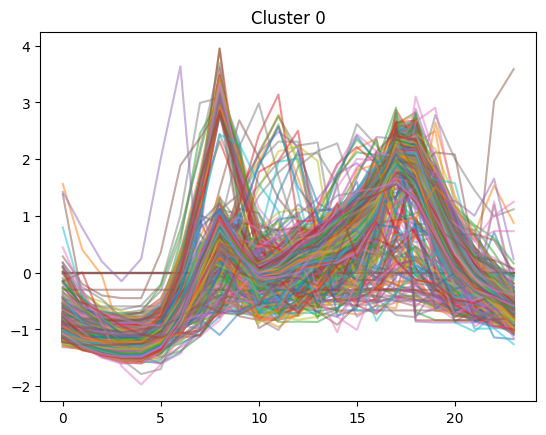

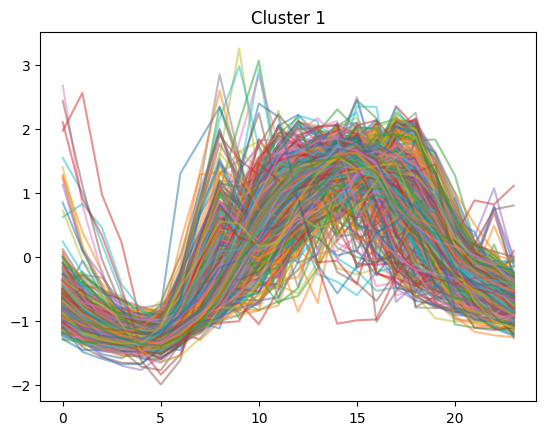

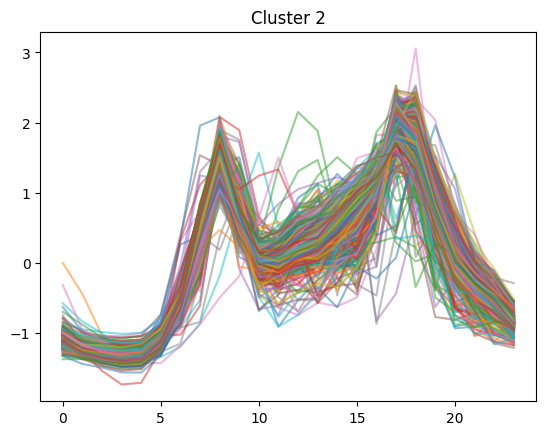

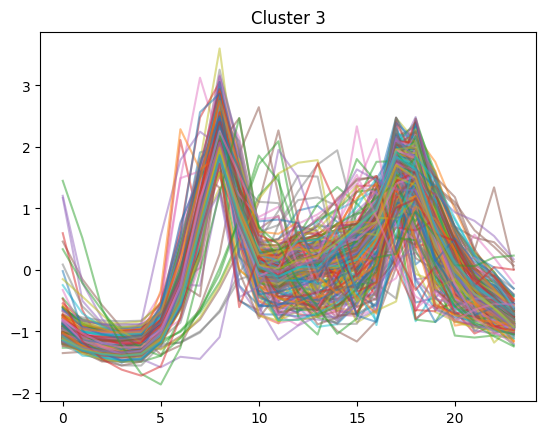

hour        cluster
date               
2013-06-01        1
2013-06-02        1
2013-06-03        1
2013-06-04        0
2013-06-05        0
...             ...
2023-12-27        1
2023-12-28        1
2023-12-29        1
2023-12-30        1
2023-12-31        1

[3807 rows x 1 columns]


In [3]:
import pandas as pd
import numpy as np
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import matplotlib.pyplot as plt

# Example data preparation
df['starttime'] = pd.to_datetime(df['starttime'])
df['date'] = df['starttime'].dt.date
df['hour'] = df['starttime'].dt.hour

# Pivot data so each row is a day, and each column is an hour
pivoted_df = df.pivot(index='date', columns='hour', values='total_trips').fillna(0)

# Convert to 3D array for tslearn (required format: n_samples x n_timestamps x n_features)
time_series_data = pivoted_df.to_numpy()
time_series_data = time_series_data[:, :, np.newaxis]  # Add a singleton dimension for features

# Normalize data
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)
time_series_data_normalized = scaler.fit_transform(time_series_data)

# Apply Time Series KMeans
n_clusters = 4  # Choose the number of clusters based on visual patterns
kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", random_state=42)
labels = kmeans.fit_predict(time_series_data_normalized)

# Add cluster labels to original data
pivoted_df['cluster'] = labels

# Visualize clusters
for cluster_num in range(n_clusters):
    plt.figure()
    for series in time_series_data_normalized[pivoted_df['cluster'] == cluster_num]:
        plt.plot(series.flatten(), alpha=0.5)
    plt.title(f"Cluster {cluster_num}")
    plt.show()

# Cluster assignment
print(pivoted_df[['cluster']])